In [3]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
import cv2

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display, Image as IPImage

from PIL import Image

from MirrorExtractor.mirror_extractor import MirrorExtractor
from MirrorFeatureExtractor.mirror_feature_extractor import MirrorFeatureExtractor


In [9]:
def extract_brightness_features(mirror_img):
        """
        Extract all features from a single mirror image
        
        Args:
            mirror_img: numpy array of shape (H, W, 3)
            
        Returns:
            dict: Dictionary of feature name -> feature value
        """
        features = {}
        
        # Brightness features
        features['brightness_mean'] = np.mean(mirror_img)
        features['brightness_std'] = np.std(mirror_img)
        features['brightness_min'] = np.min(mirror_img)
        features['brightness_max'] = np.max(mirror_img)


def get_img(img_path):
    return np.array(Image.open(img_path).convert('RGB'))
    
def show_img(img_path):
    img_np = np.array(Image.open(img_path).convert('RGB'))
    fig, ax = plt.subplots()
    ax.imshow(img_np)
    return ax

def add_mirror(mirror_id, ax):
    x_coords, y_coords = extractor.get_coords(mirror_id)
    ax.plot(x_coords, y_coords, 'r-', lw=2)
    ax.scatter(x_coords[:-1], y_coords[:-1], c='cyan', s=30)

def extract_mirror_from_image(extractor, img_path, mirror_id):
    """Extract a single mirror from an image"""
    img = np.array(Image.open(img_path).convert('RGB'))
    x_coords, y_coords = extractor.get_coords(mirror_id)
    cropped = extractor.extract_polygon_region_cv2(img, x_coords, y_coords)
    return cropped

In [ ]:
class MirrorChecker:

    def __init__(self, image_list, mirror_id, crossing_points_file):
        pass 

# Metoda A - używając PIL
img_gray = img.convert('L')
srednia_jasnosc = np.mean(np.array(img_gray))

# Metoda B - ręczna konwersja ze współczynnikami percepcyjnymi
img_array = np.array(img)
srednia_jasnosc = np.mean(0.299 * img_array[:,:,0] + 
                          0.587 * img_array[:,:,1] + 
                          0.114 * img_array[:,:,2])

In [10]:
# Initialize
extractor = MirrorExtractor(
    "/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/crossings_points.pkl"
)

    
# Get training images
img_list = glob.glob(
    "/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/webcam_useful_image/webcam_useful_images/*.jpg"
)
print(f"Found {len(img_list)} training images")


Found 380 training images


In [5]:
print(len(img_list))
img_list[:3]

380


['/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/webcam_useful_image/webcam_useful_images/image_2024-05-09_1500.jpg',
 '/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/webcam_useful_image/webcam_useful_images/image_2023-01-04_1600.jpg',
 '/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/webcam_useful_image/webcam_useful_images/image_2024-05-07_1600.jpg']

In [11]:
mirror_id = 25
mirror_img_list = []
mean_brightness_list = []
for img_path in img_list[:12]:
    mirror_img = extract_mirror_from_image(extractor, img_path, mirror_id)
    mean_brightness_list.append(np.mean(mirror_img))

In [15]:
# mirror_img.shape -> (18, 16, 3)

(18, 16, 3)

In [12]:
np.mean(np.array(mirror_img), axis=(0,1))

array([103.64236111,  92.45138889,  80.56944444])

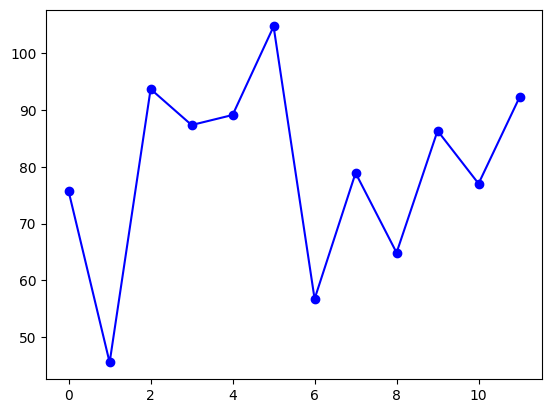

In [13]:
plt.plot(mean_brightness_list, 'bo-')